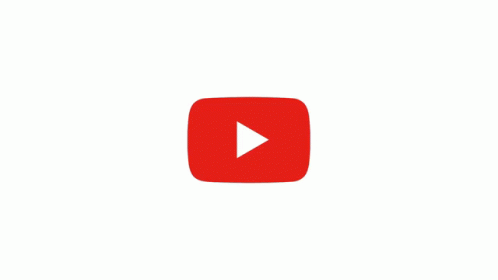
# ChatTube: Real-Time Conversational AI for YouTube Video

## Problem Statement:
Many YouTube videos, especially podcasts, lectures, and educational content, are lengthy, making it time-consuming for users to extract specific information or get a general understanding without watching the entire duration. This inefficiency hinders quick learning and information retrieval, forcing users to manually scrub through content or invest significant time to find relevant segments.

## Solution:
ChatTube is a Retrieval Augmented Generation (RAG) system that allows users to interactively "chat" with YouTube videos. By leveraging the YouTube API to fetch video transcripts and LangChain to orchestrate the RAG pipeline, ChatTube processes video content, enabling users to:
- Ask specific questions about the video's content and receive relevant, context-aware answers.
- Request summaries of the entire video or specific sections.
- Explore topics discussed within the video without needing to watch it in its entirety.
- This significantly reduces the time required to understand video content and allows for targeted information extraction.

In [1]:
# Setting OPENAI_API_KEY as environment variable
import os
os.environ["OPENAI_API_KEY"] = "sk-proj-ORV1HwUGs8R8vWlaRYLdAzJfhxLH9NYWyb5GDGGm9Il4JLsPWQX5L1I8A9hR_Cbs1a0JWaPCtUdqvv5LRedP2mIWl8A"

## Install libraries

For this project we are using following libraries
- youtube-transcript-api
- langachain-community
- langchain-openai
- faiss-cpu
- tiktoken
- python-dotenv

In [2]:
# installing required libraries 
!pip install -q youtube-transcript-api langchain-community langchain-openai \
               faiss-cpu tiktoken python-dotenv


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from youtube_transcript_api import YouTubeTranscriptApi, TranscriptsDisabled
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import PromptTemplate

## Step 1a - Indexing (Document Ingestion)

Using the video id, get the transcripts of the video. In case if video doesn't have transcript/captions just print it with proper message.

In [4]:
video_id = "Gfr50f6ZBvo" # only the ID, not full URL
try:
    # If you don’t care which language, this returns the “best” one
    transcript_list = YouTubeTranscriptApi.get_transcript(video_id, languages=["en"])

    # Flatten it to plain text
    transcript = " ".join(chunk["text"] for chunk in transcript_list)
    print(transcript)

except TranscriptsDisabled:
    print("No captions available for this video.")

the following is a conversation with demus hasabis ceo and co-founder of deepmind a company that has published and builds some of the most incredible artificial intelligence systems in the history of computing including alfred zero that learned all by itself to play the game of gold better than any human in the world and alpha fold two that solved protein folding both tasks considered nearly impossible for a very long time demus is widely considered to be one of the most brilliant and impactful humans in the history of artificial intelligence and science and engineering in general this was truly an honor and a pleasure for me to finally sit down with him for this conversation and i'm sure we will talk many times again in the future this is the lex friedman podcast to support it please check out our sponsors in the description and now dear friends here's demis hassabis let's start with a bit of a personal question am i an ai program you wrote to interview people until i get good enough 

In [5]:
transcript_list

[{'text': 'the following is a conversation with',
  'start': 0.08,
  'duration': 3.44},
 {'text': 'demus hasabis', 'start': 1.76, 'duration': 4.96},
 {'text': 'ceo and co-founder of deepmind', 'start': 3.52, 'duration': 5.119},
 {'text': 'a company that has published and builds',
  'start': 6.72,
  'duration': 4.48},
 {'text': 'some of the most incredible artificial',
  'start': 8.639,
  'duration': 4.561},
 {'text': 'intelligence systems in the history of',
  'start': 11.2,
  'duration': 4.8},
 {'text': 'computing including alfred zero that',
  'start': 13.2,
  'duration': 3.68},
 {'text': 'learned', 'start': 16.0, 'duration': 2.96},
 {'text': 'all by itself to play the game of gold',
  'start': 16.88,
  'duration': 4.559},
 {'text': 'better than any human in the world and',
  'start': 18.96,
  'duration': 5.6},
 {'text': 'alpha fold two that solved protein',
  'start': 21.439,
  'duration': 4.241},
 {'text': 'folding', 'start': 24.56, 'duration': 4.16},
 {'text': 'both tasks consider

## Step 1b - Indexing (Text Splitting)

Create chunks from transcript with a size of 1000 using Recursive Character Text Splitter

In [6]:
splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
chunks = splitter.create_documents([transcript])

In [7]:
len(chunks)

168

In [8]:
chunks[100]

Document(metadata={}, page_content="and and kind of come up with descriptions of the electron clouds where they're gonna go how they're gonna interact when you put two elements together uh and what we try to do is learn a simulation uh uh learner functional that will describe more chemistry types of chemistry so um until now you know you can run expensive simulations but then you can only simulate very small uh molecules very simple molecules we would like to simulate large materials um and so uh today there's no way of doing that and we're building up towards uh building functionals that approximate schrodinger's equation and then allow you to describe uh what the electrons are doing and all materials sort of science and material properties are governed by the electrons and and how they interact so have a good summarization of the simulation through the functional um but one that is still close to what the actual simulation would come out with so what um how difficult is that to ask w

## Step 1c & 1d - Indexing (Embedding Generation and Storing in Vector Store)

Using Open AI text-embedding-3-small model to generate embedding and storing in FAISS vector store

In [11]:
# Initialize Open AI embedding model
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

#Generate the vector store for intialised embedding model and created chunks of transcript
vector_store = FAISS.from_documents(chunks, embeddings)

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-proj-***************************************************************************************Wl8A. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [9]:
vector_store.index_to_docstore_id

NameError: name 'vector_store' is not defined

In [ ]:
vector_store.get_by_ids(['2436bdb8-3f5f-49c6-8915-0c654c888700'])

[Document(id='2436bdb8-3f5f-49c6-8915-0c654c888700', metadata={}, page_content='demas establish to support this podcast please check out our sponsors in the description and now let me leave you with some words from edskar dykstra computer science is no more about computers than astronomy is about telescopes thank you for listening and hope to see you next time')]

## Step 2 - Retrieval

In [12]:
#Creating user Query
query = "What is deepmind"

Create retriever of search type "Similarity" from vector store

In [ ]:
retriever = vector_store.as_retriever(search_type="similarity", search_kwargs={"k": 4})

In [ ]:
retriever

VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x7fdba029d2d0>, search_kwargs={'k': 4})

In [ ]:
retriever.invoke(query)

[Document(id='7c0f7504-08fa-4f33-8708-d29bfc601f84', metadata={}, page_content="the following is a conversation with demus hasabis ceo and co-founder of deepmind a company that has published and builds some of the most incredible artificial intelligence systems in the history of computing including alfred zero that learned all by itself to play the game of gold better than any human in the world and alpha fold two that solved protein folding both tasks considered nearly impossible for a very long time demus is widely considered to be one of the most brilliant and impactful humans in the history of artificial intelligence and science and engineering in general this was truly an honor and a pleasure for me to finally sit down with him for this conversation and i'm sure we will talk many times again in the future this is the lex friedman podcast to support it please check out our sponsors in the description and now dear friends here's demis hassabis let's start with a bit of a personal qu

## Step 3 - Augmentation

Creating a Open AI model "gpt-4o-mini" with a temperature of 0.2

In [ ]:
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.2)

Create a prompt for model having context (basically retrieved content based on query) and the original query.

In [ ]:
prompt = PromptTemplate(
    template="""
      You are a helpful assistant.
      Answer ONLY from the provided transcript context.
      If the context is insufficient, just say you don't know.

      {context}
      Question: {question}
    """,
    input_variables = ['context', 'question']
)

In [ ]:
# Retrieve content based on user's question
question          = "is the topic of nuclear fusion discussed in this video? if yes then what was discussed"
retrieved_docs    = retriever.invoke(question)

In [ ]:
retrieved_docs

[Document(id='3c60d0d6-5d01-4dfc-99fc-5c4bb4422cb0', metadata={}, page_content="so we with this problem and we published it in a nature paper last year uh we held the fusion that we held the plasma in specific shapes so actually it's almost like carving the plasma into different shapes and control and hold it there for the record amount of time so um so that's one of the problems of of fusion sort of um solved so i have a controller that's able to no matter the shape uh contain it continue yeah contain it and hold it in structure and there's different shapes that are better for for the energy productions called droplets and and and so on so um so that was huge and now we're looking we're talking to lots of fusion startups to see what's the next problem we can tackle uh in the fusion area so another fascinating place in a paper title pushing the frontiers of density functionals by solving the fractional electron problem so you're taking on modeling and simulating the quantum mechanical 

In [ ]:
# Flatten the content into a plain text
context_text = "\n\n".join(doc.page_content for doc in retrieved_docs)
context_text

"so we with this problem and we published it in a nature paper last year uh we held the fusion that we held the plasma in specific shapes so actually it's almost like carving the plasma into different shapes and control and hold it there for the record amount of time so um so that's one of the problems of of fusion sort of um solved so i have a controller that's able to no matter the shape uh contain it continue yeah contain it and hold it in structure and there's different shapes that are better for for the energy productions called droplets and and and so on so um so that was huge and now we're looking we're talking to lots of fusion startups to see what's the next problem we can tackle uh in the fusion area so another fascinating place in a paper title pushing the frontiers of density functionals by solving the fractional electron problem so you're taking on modeling and simulating the quantum mechanical behavior of electrons yes um can you explain this work and can ai model and\n\n

In [ ]:
# Generate final prompt using flattened context and user's question
final_prompt = prompt.invoke({"context": context_text, "question": question})

In [ ]:
final_prompt

StringPromptValue(text="\n      You are a helpful assistant.\n      Answer ONLY from the provided transcript context.\n      If the context is insufficient, just say you don't know.\n\n      so we with this problem and we published it in a nature paper last year uh we held the fusion that we held the plasma in specific shapes so actually it's almost like carving the plasma into different shapes and control and hold it there for the record amount of time so um so that's one of the problems of of fusion sort of um solved so i have a controller that's able to no matter the shape uh contain it continue yeah contain it and hold it in structure and there's different shapes that are better for for the energy productions called droplets and and and so on so um so that was huge and now we're looking we're talking to lots of fusion startups to see what's the next problem we can tackle uh in the fusion area so another fascinating place in a paper title pushing the frontiers of density functionals

## Step 4 - Generation

In [ ]:
answer = llm.invoke(final_prompt)
print(answer.content)

Yes, the topic of nuclear fusion is discussed in the video. The discussion includes the following points:

1. The speaker mentions a problem in fusion that was published in a Nature paper, where they developed a controller that can hold plasma in specific shapes for a record amount of time, which is crucial for energy production.

2. They talk about collaborating with EPFL in Switzerland, which has a test reactor that they used for their experiments. The focus is on identifying bottleneck problems in fusion and applying AI methods to address those challenges.

3. The speaker emphasizes the potential of AI to help accelerate solutions in energy and climate, specifically mentioning fusion as an area where AI can contribute.

4. They also mention their work on magnetic control of tokamak plasmas using deep reinforcement learning, indicating that they are exploring how AI can assist in controlling high-temperature plasmas for nuclear fusion.


## Building a Chain

### Importing LangChain Core Components
We'll start by importing some essential building blocks from langchain_core. These "Runnables" are the heart of the LangChain Expression Language (LCEL), allowing us to create flexible and powerful data processing pipelines.
#### RunnableParallel:
- What it does: Allows you to run multiple operations (Runnables) at the same time, usually on the same input or related inputs. It then combines their results, typically into a dictionary.
- Analogy: Think of a team where one person fetches data, another formats a question, and both results are needed for the next step. RunnableParallel manages this.
- Use Case: Simultaneously retrieving context from a vector store and passing through the original user question.
#### RunnablePassthrough:
- What it does: Simply takes its input and passes it to the next component in the chain without changing it.
- Analogy: A conveyor belt moving an item to the next station untouched.
- Use Case: Ensuring the original question is carried along with retrieved documents to be used in a prompt.
#### RunnableLambda:
- What it does: Lets you turn any Python function (even a quick lambda function) into a compatible LangChain Runnable.
- Analogy: Creating a custom tool for a very specific, small task in your pipeline.
- Use Case: Formatting retrieved documents before they are sent to the LLM, or extracting a specific piece of data.
                                                                                                                  
We also import an output parser:
#### StrOutputParser:
- What it does: Takes the (often structured) output from a Language Model and converts it into a simple Python string.
- Analogy: Taking a formal letter (LLM output) and just reading out the main message.
- Use Case: Getting the direct textual answer from the LLM after it has processed a prompt.

In [ ]:
from langchain_core.runnables import RunnableParallel, RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser

Defining a function to flatten the retrieved docs into a string.

In [ ]:
def format_docs(retrieved_docs):
  context_text = "\n\n".join(doc.page_content for doc in retrieved_docs)
  return context_text

In [ ]:
# Create a parallel chain of two chain. First is used to retrieve and flatten the list of documents based on user's question 
# and other is just a passthrough which is used to pass the question as it is.  
parallel_chain = RunnableParallel({
    'context': retriever | RunnableLambda(format_docs),
    'question': RunnablePassthrough()
})

In [ ]:
parallel_chain.invoke('who is Demis')

{'context': "the following is a conversation with demus hasabis ceo and co-founder of deepmind a company that has published and builds some of the most incredible artificial intelligence systems in the history of computing including alfred zero that learned all by itself to play the game of gold better than any human in the world and alpha fold two that solved protein folding both tasks considered nearly impossible for a very long time demus is widely considered to be one of the most brilliant and impactful humans in the history of artificial intelligence and science and engineering in general this was truly an honor and a pleasure for me to finally sit down with him for this conversation and i'm sure we will talk many times again in the future this is the lex friedman podcast to support it please check out our sponsors in the description and now dear friends here's demis hassabis let's start with a bit of a personal question am i an ai program you wrote to interview people until i get

In [ ]:
# Create string output parser 
parser = StrOutputParser()

In [ ]:
# create a main chain that will first generate context and question using parallel chain and then uses prompt to create a prompt, passes it to the llm
# and finally generate string/text using parser
main_chain = parallel_chain | prompt | llm | parser

In [ ]:
main_chain.invoke('Can you summarize the video')

'The video features a conversation with Demas, who discusses the need for deeper and simpler explanations in physics, particularly in relation to consciousness, life, and gravity. He emphasizes the limitations of the current standard model of physics and the importance of exploring more fundamental explanations. Additionally, he talks about advancements in fusion research, specifically how they have managed to hold plasma in specific shapes for extended periods, which is a significant step in fusion energy production. The conversation touches on the potential of AI in modeling quantum mechanical behavior, particularly regarding electrons. The discussion concludes with a quote about the nature of computer science.'